## Resolução numérica da Equação de Saint-Venant

Solução por diferenças finitas da Equação da Onda Cinemática

$$
\frac{\partial Q}{\partial x}+\alpha \beta Q^{\beta-1} \frac{\partial Q}{\partial t}=q
$$

Esquema implícito de diferenças finitas

$$
\frac{Q_{i+1}^{j+1}-Q_i^{j+1}}{\Delta x}+\alpha \beta\left(\frac{Q_{i+1}^j+Q_i^{j+1}}{2}\right)^{\beta-1}\left(\frac{Q_{i+1}^{j+1}-Q_{i+1}^j}{\Delta t}\right)=\frac{q_{i+1}^{j+1}+q_{i+1}^j}{2}
$$

Isolando $Q_{i+1}^{j+1}$:

$$
Q_{i+1}^{j+1}=\frac{\left[\frac{\Delta t}{\Delta x} Q_i^{j+1}+\alpha \beta Q_{i+1}^j\left(\frac{Q_{i+1}^j+Q_i^{j+1}}{2}\right)^{\beta-1}+\Delta t\left(\frac{q_{i+1}^{j+1}+q_{i+1}^j}{2}\right)\right]}{\left[\frac{\Delta t}{\Delta x}+\alpha \beta\left(\frac{Q_{i+1}^j+Q_i^{j+1}}{2}\right)^{\beta-1}\right]}
$$



### Enunciado

**Exemplo 9.6.1.** Usando os mesmos dados para o canal retangular no **Exemplo 9.4.1** (largura = 200 pés, comprimento = 15.000 pés, inclinação = 1 por cento e n de Manning = 0,035), desenvolva um modelo de onda cinemática linear e propague o hidrograma de afluência dado nas colunas 1 e 2 da Tabela 9.4.1 através do canal usando $\Delta x$ = 3000 pés e $\Delta t$ = $3$ min = $3\times 60 = 180$ s. Não há entrada lateral. A condição inicial é um fluxo uniforme de 2.000 cfs ao longo do canal.


Substituindo os valores do exercício

$$
Q_{i+1}^{j+1}=\frac{\left[\frac{180}{3000} Q_i^{j+1}+(3.49)(0.6) Q_{i+1}^j\left(\frac{Q_{i+1}^j+Q_i^{j+1}}{2}\right)^{(0.6-1)}\right]}{\left[\frac{180}{3000}+(3.49)(0.6)\left(\frac{Q_{i+1}^j+Q_i^{j+1}}{2}\right)^{(0.6-1)}\right]}
$$

In [27]:
from numpy import zeros, ones, linspace, pi, sin, exp, array
import matplotlib.pyplot as plt

In [28]:
# Grade do espaço e do tempo
dx = 3000.0 # ft
dt = 3. # min

L = 15000.0 # ft
T = 150.0 # min
nx = int(L/dx)
nt = int(T/dt)

In [29]:
nx, nt

(5, 50)

In [30]:
# Vazão variando no tempo e no espaço
Q = zeros((nx+1,nt+1),float)
# Vazão afluente
Qa = ones((nt+1),float)*2000

In [31]:
t = linspace(0.0,T,nt+1)
x = linspace(0.0,L,nx+1)
print(len(x),x)
print(len(t),t)

6 [    0.  3000.  6000.  9000. 12000. 15000.]
51 [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123.
 126. 129. 132. 135. 138. 141. 144. 147. 150.]


In [32]:
# preenchendo a vazão na posição zero
for i in range(6,22):
  Qa[i] = Qa[i-1] + 250
  print(i,Qa[i])

for i in range(22,38):
  Qa[i] = Qa[i-1] - 250
  print(i,Qa[i])

6 2250.0
7 2500.0
8 2750.0
9 3000.0
10 3250.0
11 3500.0
12 3750.0
13 4000.0
14 4250.0
15 4500.0
16 4750.0
17 5000.0
18 5250.0
19 5500.0
20 5750.0
21 6000.0
22 5750.0
23 5500.0
24 5250.0
25 5000.0
26 4750.0
27 4500.0
28 4250.0
29 4000.0
30 3750.0
31 3500.0
32 3250.0
33 3000.0
34 2750.0
35 2500.0
36 2250.0
37 2000.0


In [33]:
# Preenchendo para a posição zero
Q[0,:] = Qa

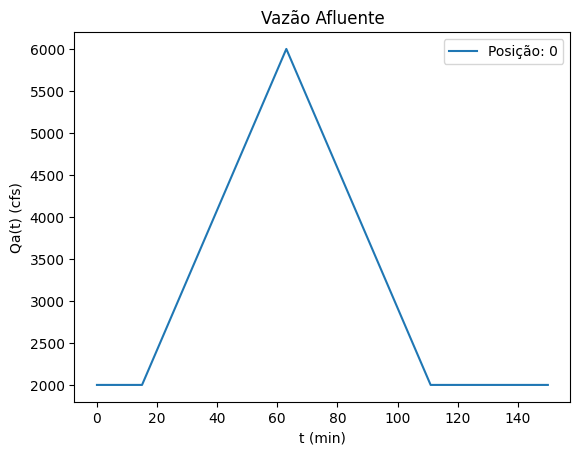

In [34]:
#plt.xlim([0,10])
#plt.ylim([0,2.0])
plt.title('Vazão Afluente')
plt.xlabel('t (min)')
plt.ylabel('Qa(t) (cfs)')
plt.plot(t,Q[0,:], label="Posição: 0")
plt.legend(loc='best')
plt.savefig('vazao_afluente.pdf', dpi = 300, bbox_inches='tight')
plt.show();

Equação a ser resolvida

$$
Q_{i+1}^{j+1}=\frac{\left[\frac{180}{3000} Q_i^{j+1}+(3.49)(0.6) Q_{i+1}^j\left(\frac{Q_{i+1}^j+Q_i^{j+1}}{2}\right)^{(0.6-1)}\right]}{\left[\frac{180}{3000}+(3.49)(0.6)\left(\frac{Q_{i+1}^j+Q_i^{j+1}}{2}\right)^{(0.6-1)}\right]}
$$

In [35]:
# Preenchendo vazão até o tempo j=6
for i in range(nx+1):
  Q[i,0:6] = Q[0,0:6]

In [36]:
#for i in range(nx):
for i in range(nx):
  for j in range(5,nt):
    num = ((180/3000)*Q[i,j+1]+(3.49)*(0.6)*Q[i+1,j]*((Q[i+1,j]+Q[i,j+1])/2)**(0.6-1))
    den = ((180/3000)+(3.49)*(0.6)*((Q[i+1,j]+Q[i,j+1])/2)**(0.6-1))
    Q[i+1,j+1] = num/den
    print(i,j,Q[i+1,j+1])

0 5 2095.098514013303
0 6 2252.1117904192365
0 7 2449.211273994374
0 8 2671.7790638544006
0 9 2910.0782015138784
0 10 3157.741664045391
0 11 3410.710635860562
0 12 3666.4732921567897
0 13 3923.5265603962534
0 14 4181.006037337906
0 15 4438.439539530244
0 16 4695.588158530226
0 17 4952.346879384379
0 18 5208.684294148689
0 19 5464.607136353394
0 20 5720.14009641577
0 21 5734.393105438713
0 22 5622.996066906989
0 23 5446.943166676995
0 24 5237.767603207461
0 25 5011.667787459591
0 26 4776.973223761939
0 27 4537.993178961919
0 28 4296.982662726021
0 29 4055.145583310972
0 30 3813.1485270873
0 31 3571.3860387175723
0 32 3330.119675890498
0 33 3089.5531522297074
0 34 2849.8756961436156
0 35 2611.290678553588
0 36 2374.0392781033097
0 37 2230.741113005563
0 38 2143.0673448795887
0 39 2088.988666394928
0 40 2055.46132203242
0 41 2034.6086012707462
0 42 2021.612966095039
0 43 2013.5037710091922
0 44 2008.4397053384273
0 45 2005.2757200337187
0 46 2003.2982807373485
0 47 2002.0621756225796
0 48

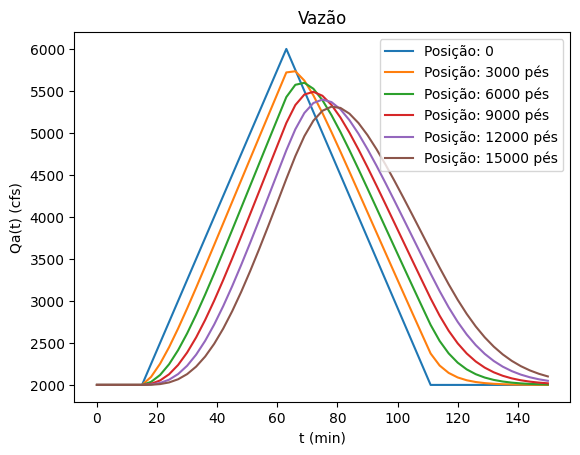

In [37]:
plt.title('Vazão')
plt.xlabel('t (min)')
plt.ylabel('Qa(t) (cfs)')
plt.plot(t,Q[0,:], label="Posição: 0")
plt.plot(t,Q[1,:], label="Posição: 3000 pés")
plt.plot(t,Q[2,:], label="Posição: 6000 pés")
plt.plot(t,Q[3,:], label="Posição: 9000 pés")
plt.plot(t,Q[4,:], label="Posição: 12000 pés")
plt.plot(t,Q[5,:], label="Posição: 15000 pés")
plt.legend(loc='best');

### Conversão de unidades

Caso queiram converter para o SI:

* 1 pé  = 0,3048 metros